In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
dataframe = pd.read_csv('../data/raw/heart.csv')

In [3]:
X = dataframe.iloc[:, 0:13].values
y = dataframe.iloc[:, 13].values

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [6]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 85.25%


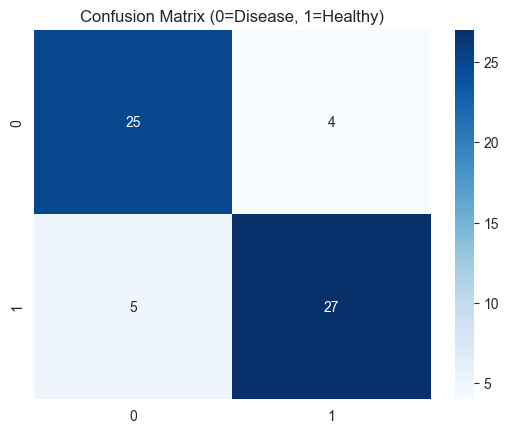

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix (0=Disease, 1=Healthy)')
plt.show()

In [8]:
print(f"--- Model Results ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Model Results ---
Accuracy: 85.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
def predict_patient(data_list, profile_name):
    patient_raw = np.array([data_list])

    patient_scaled = scaler.transform(patient_raw)

    pred = lr.predict(patient_scaled)[0]
    prob = lr.predict_proba(patient_scaled)[0]

    label = "Healthy" if pred == 1 else "Heart Disease"
    confidence = prob[pred] * 100

    print(f"--- {profile_name} ---")
    print(f"Result: {label}")
    print(f"Confidence: {confidence:.2f}%")
    print("-" * 30)

In [10]:
healthy_sample = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
predict_patient(healthy_sample, "Sample from Data (Healthy)")

high_risk_sample = [70, 1, 0, 180, 300, 1, 0, 100, 1, 3.5, 0, 3, 3]
predict_patient(high_risk_sample, "Custom High Risk Profile")

low_risk_sample = [30, 0, 0, 110, 180, 0, 1, 180, 0, 0.0, 2, 0, 2]
predict_patient(low_risk_sample, "Custom Low Risk Profile")

--- Sample from Data (Healthy) ---
Result: Healthy
Confidence: 76.92%
------------------------------
--- Custom High Risk Profile ---
Result: Heart Disease
Confidence: 99.99%
------------------------------
--- Custom Low Risk Profile ---
Result: Healthy
Confidence: 98.53%
------------------------------


In [11]:
import joblib

joblib.dump(lr, '../models/heart_disease_model.pkl')

joblib.dump(scaler, '../models/data_scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
